## Get data from kaggle and unzip

In [ ]:
!pip install -q kaggle

In [ ]:
! rm -rf ~/.kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"fvantonio","key":"01f006b8cfc9760d94673b8f04d98e9f"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                   title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                        2MB  2022-05-15 00:01:23           3435        116  1.0              
muratkokludataset/date-fruit-datasets                                 Date Fruit Datasets                              408KB  2022-04-03 09:25:39          11320       1480  0.9375           
paradisejoy/top-hits-spotify-from-20002019                            Top Hits Spotify from 2000-2019                   94KB  2022-04-26 17:30:03           3184         84  1.0              
muratkokludataset/rice-image-dataset         

In [ ]:
!kaggle competitions download -c digit-recognizer

 52% 8.00M/15.3M [00:00<00:00, 78.3MB/s]
100% 15.3M/15.3M [00:00<00:00, 113MB/s] 


In [ ]:
!unzip /content/digit-recognizer.zip

Archive:  /content/digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Reading csv and exploring

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

train = pd.read_csv('train.csv')
train.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
labels_train = train['label'].values
X_train = train.iloc[:,1:]
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
labels_train[:10], labels_train.shape, X_train.shape

(array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3]), (42000,), (42000, 784))

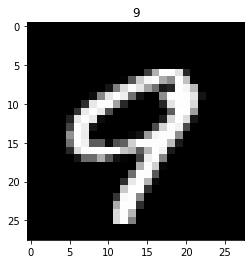

In [ ]:
number = X_train.loc[100].values.reshape(28,28)
plt.imshow(number, cmap='gray')
plt.title(labels_train[100]);

In [ ]:
numbers_train = X_train.values.reshape(42000, 28, 28)
numbers_train = np.expand_dims(numbers_train, axis=1)
numbers_train.shape, labels_train.shape

((42000, 1, 28, 28), (42000,))

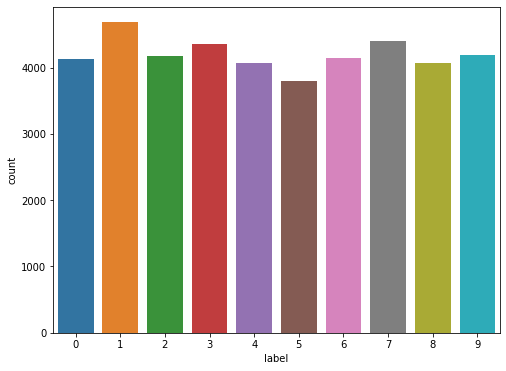

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='label', data=train);

## Creating model

In [ ]:
batch_size = 16
n_epochs = 20

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch


class Classifier(nn.Module):
  def __init__(self, im_chan=1, hidden_dim=16, n_classes=10):
    super().__init__()
    self.conv1 = nn.Conv2d(im_chan, hidden_dim, 5, stride=1, padding=2)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(hidden_dim, hidden_dim*2, 5, stride=1, padding=2)
    self.fc1 = nn.Linear(1568, 64)
    self.fc3 = nn.Linear(64, 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = torch.flatten(x, 1)
    x = F.relu(self.fc1(x))
    x = self.fc3(x)

    return x

model1 = Classifier()

In [ ]:
import torchvision

inputs = torch.Tensor(numbers_train)
targets = torch.Tensor(labels_train)
targets = targets.type(torch.LongTensor)

trainset = torch.utils.data.TensorDataset(inputs, targets)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, 
                                          shuffle=True, num_workers=2)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optim = optim.Adam(model1.parameters(), lr=0.01)

In [ ]:
for epoch in range(n_epochs):

  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):

    inputs, labels = data

    optim.zero_grad()

    outputs = model1(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optim.step()

    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0


print('Finished Training')

[1,  2000] loss: 0.614
[2,  2000] loss: 0.429
[3,  2000] loss: 0.450
[4,  2000] loss: 0.425
[5,  2000] loss: 0.424
[6,  2000] loss: 0.401
[7,  2000] loss: 0.379
[8,  2000] loss: 0.428
[9,  2000] loss: 0.398
[10,  2000] loss: 0.345
[11,  2000] loss: 0.390
[12,  2000] loss: 0.339
[13,  2000] loss: 0.329
[14,  2000] loss: 0.310
[15,  2000] loss: 0.327
[16,  2000] loss: 0.310
[17,  2000] loss: 0.315
[18,  2000] loss: 0.373
[19,  2000] loss: 0.336
[20,  2000] loss: 0.334
Finished Training


In [ ]:
torch.save(model1.state_dict(), 'mnist-cnn.pt')

In [ ]:
preds = (model1(torch.Tensor(numbers_train)))
labels_preds = torch.argmax(preds, dim=1)

In [ ]:
labels_preds[:10].numpy(), labels_train[:10]

(array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3]), array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3]))

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(labels_preds, labels_train)

0.9097142857142857

## Predicting test dataset

In [ ]:
test = pd.read_csv('test.csv')

test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test.shape

(28000, 784)

In [ ]:
X_test = np.expand_dims(test.values.reshape(28000, 28, 28), axis=1)
X_test.shape

(28000, 1, 28, 28)

In [ ]:
preds = (model1(torch.Tensor(X_test)))
labels_preds = torch.argmax(preds, dim=1)

In [ ]:
respostas = pd.DataFrame(labels_preds)
respostas = respostas.reset_index()
respostas.columns = ['ImageId', 'Label']
respostas['ImageId'] += 1
respostas.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [ ]:
respostas.to_csv('submission.csv', index=False)

## Submit

In [ ]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "First submission"

100% 208k/208k [00:01<00:00, 145kB/s]
Successfully submitted to Digit Recognizer

# Tensorflow


In [ ]:
y = train['label']
X = train.iloc[:,1:].values

In [ ]:
import tensorflow as tf

(x_train1, y_train1), (x_test1, y_test1) = tf.keras.datasets.mnist.load_data()

In [ ]:
train1 = np.concatenate([x_train1, x_test1], axis=0)
y_train1 = np.concatenate([y_train1, y_test1], axis=0)

X_train1 = train1.reshape(-1, 28*28)

X_train = np.concatenate((X, X_train1))
y_train = np.concatenate((y, y_train1))

X_train = X_train.reshape(-1, 28, 28, 1)

X_train.shape, y_train.shape

((112000, 28, 28, 1), (112000,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1)

## Modelagem

In [ ]:
!nvidia-smi

Mon May 30 17:29:57 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X = X.reshape(-1, 28, 28, 1)
X = X / 255.0

X.shape

(42000, 28, 28, 1)

In [ ]:
model_tf = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (5,5), input_shape=(28,28,1), activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(10, activation="softmax")                                
])

model_tf.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])


In [ ]:
history = model_tf.fit(X_train, y_train, epochs=50,
                       validation_data=(X_test, y_test))

Epoch 1/50
3150/3150 [==============================] - 32s 6ms/step - loss: 0.1029 - accuracy: 0.9692 - val_loss: 0.0655 - val_accuracy: 0.9812
Epoch 2/50
3150/3150 [==============================] - 17s 5ms/step - loss: 0.0486 - accuracy: 0.9857 - val_loss: 0.0260 - val_accuracy: 0.9929
Epoch 3/50
3150/3150 [==============================] - 18s 6ms/step - loss: 0.0379 - accuracy: 0.9894 - val_loss: 0.0284 - val_accuracy: 0.9924
Epoch 4/50
3150/3150 [==============================] - 17s 5ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0279 - val_accuracy: 0.9932
Epoch 5/50
3150/3150 [==============================] - 19s 6ms/step - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0256 - val_accuracy: 0.9938
Epoch 6/50
3150/3150 [==============================] - 18s 6ms/step - loss: 0.0227 - accuracy: 0.9932 - val_loss: 0.0208 - val_accuracy: 0.9951
Epoch 7/50
3150/3150 [==============================] - 17s 5ms/step - loss: 0.0190 - accuracy: 0.9941 - val_loss: 0.0236 - val_ac

## Predicting test

In [ ]:
test = pd.read_csv('test.csv')

test_data = test.values.reshape(-1, 28, 28, 1)
test_data = test_data / 255.0

test_data.shape

(28000, 28, 28, 1)

In [ ]:
preds = model_tf.predict(test_data)
preds = preds.argmax(axis=1)

preds[:10]

array([2, 0, 9, 0, 3, 7, 0, 3, 0, 3])

In [ ]:
respostas = pd.DataFrame(preds)
respostas = respostas.reset_index()
respostas.columns = ['ImageId', 'Label']
respostas['ImageId'] += 1
respostas.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
respostas.to_csv('submission.csv', index=False)

## Submit


In [ ]:
!kaggle competitions submit -c digit-recognizer -f submission.csv -m "Trying with tensorflow"

100% 208k/208k [00:00<00:00, 368kB/s]
Successfully submitted to Digit Recognizer